In [50]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling  import SMOTE
from imblearn.pipeline import make_pipeline

In [2]:
# Loading the dataset

df = pd.read_csv("framingham.csv")

In [3]:
# See what the dataset look like

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# Checking the size of the dataset

df.shape

(4240, 16)

In [5]:
# Checking some information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
# Null values are obseved in the dataset from the above

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Tasks

* input missing values
* Scale the dataset

## Exploratory Data Analysis

In [7]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
num_cols = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

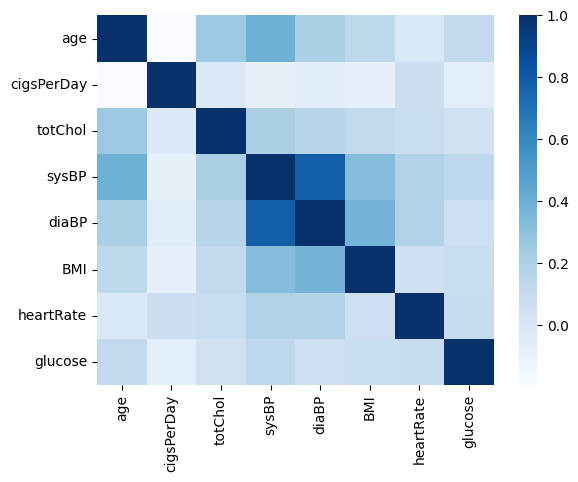

In [9]:
sns.heatmap(df[num_cols].corr(), cmap='Blues');

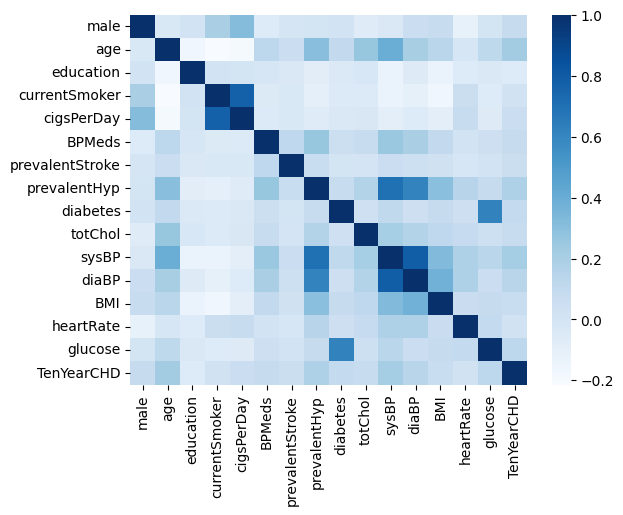

In [10]:
# Check to see the correlation between Variables

sns.heatmap(df.corr(), cmap='Blues');

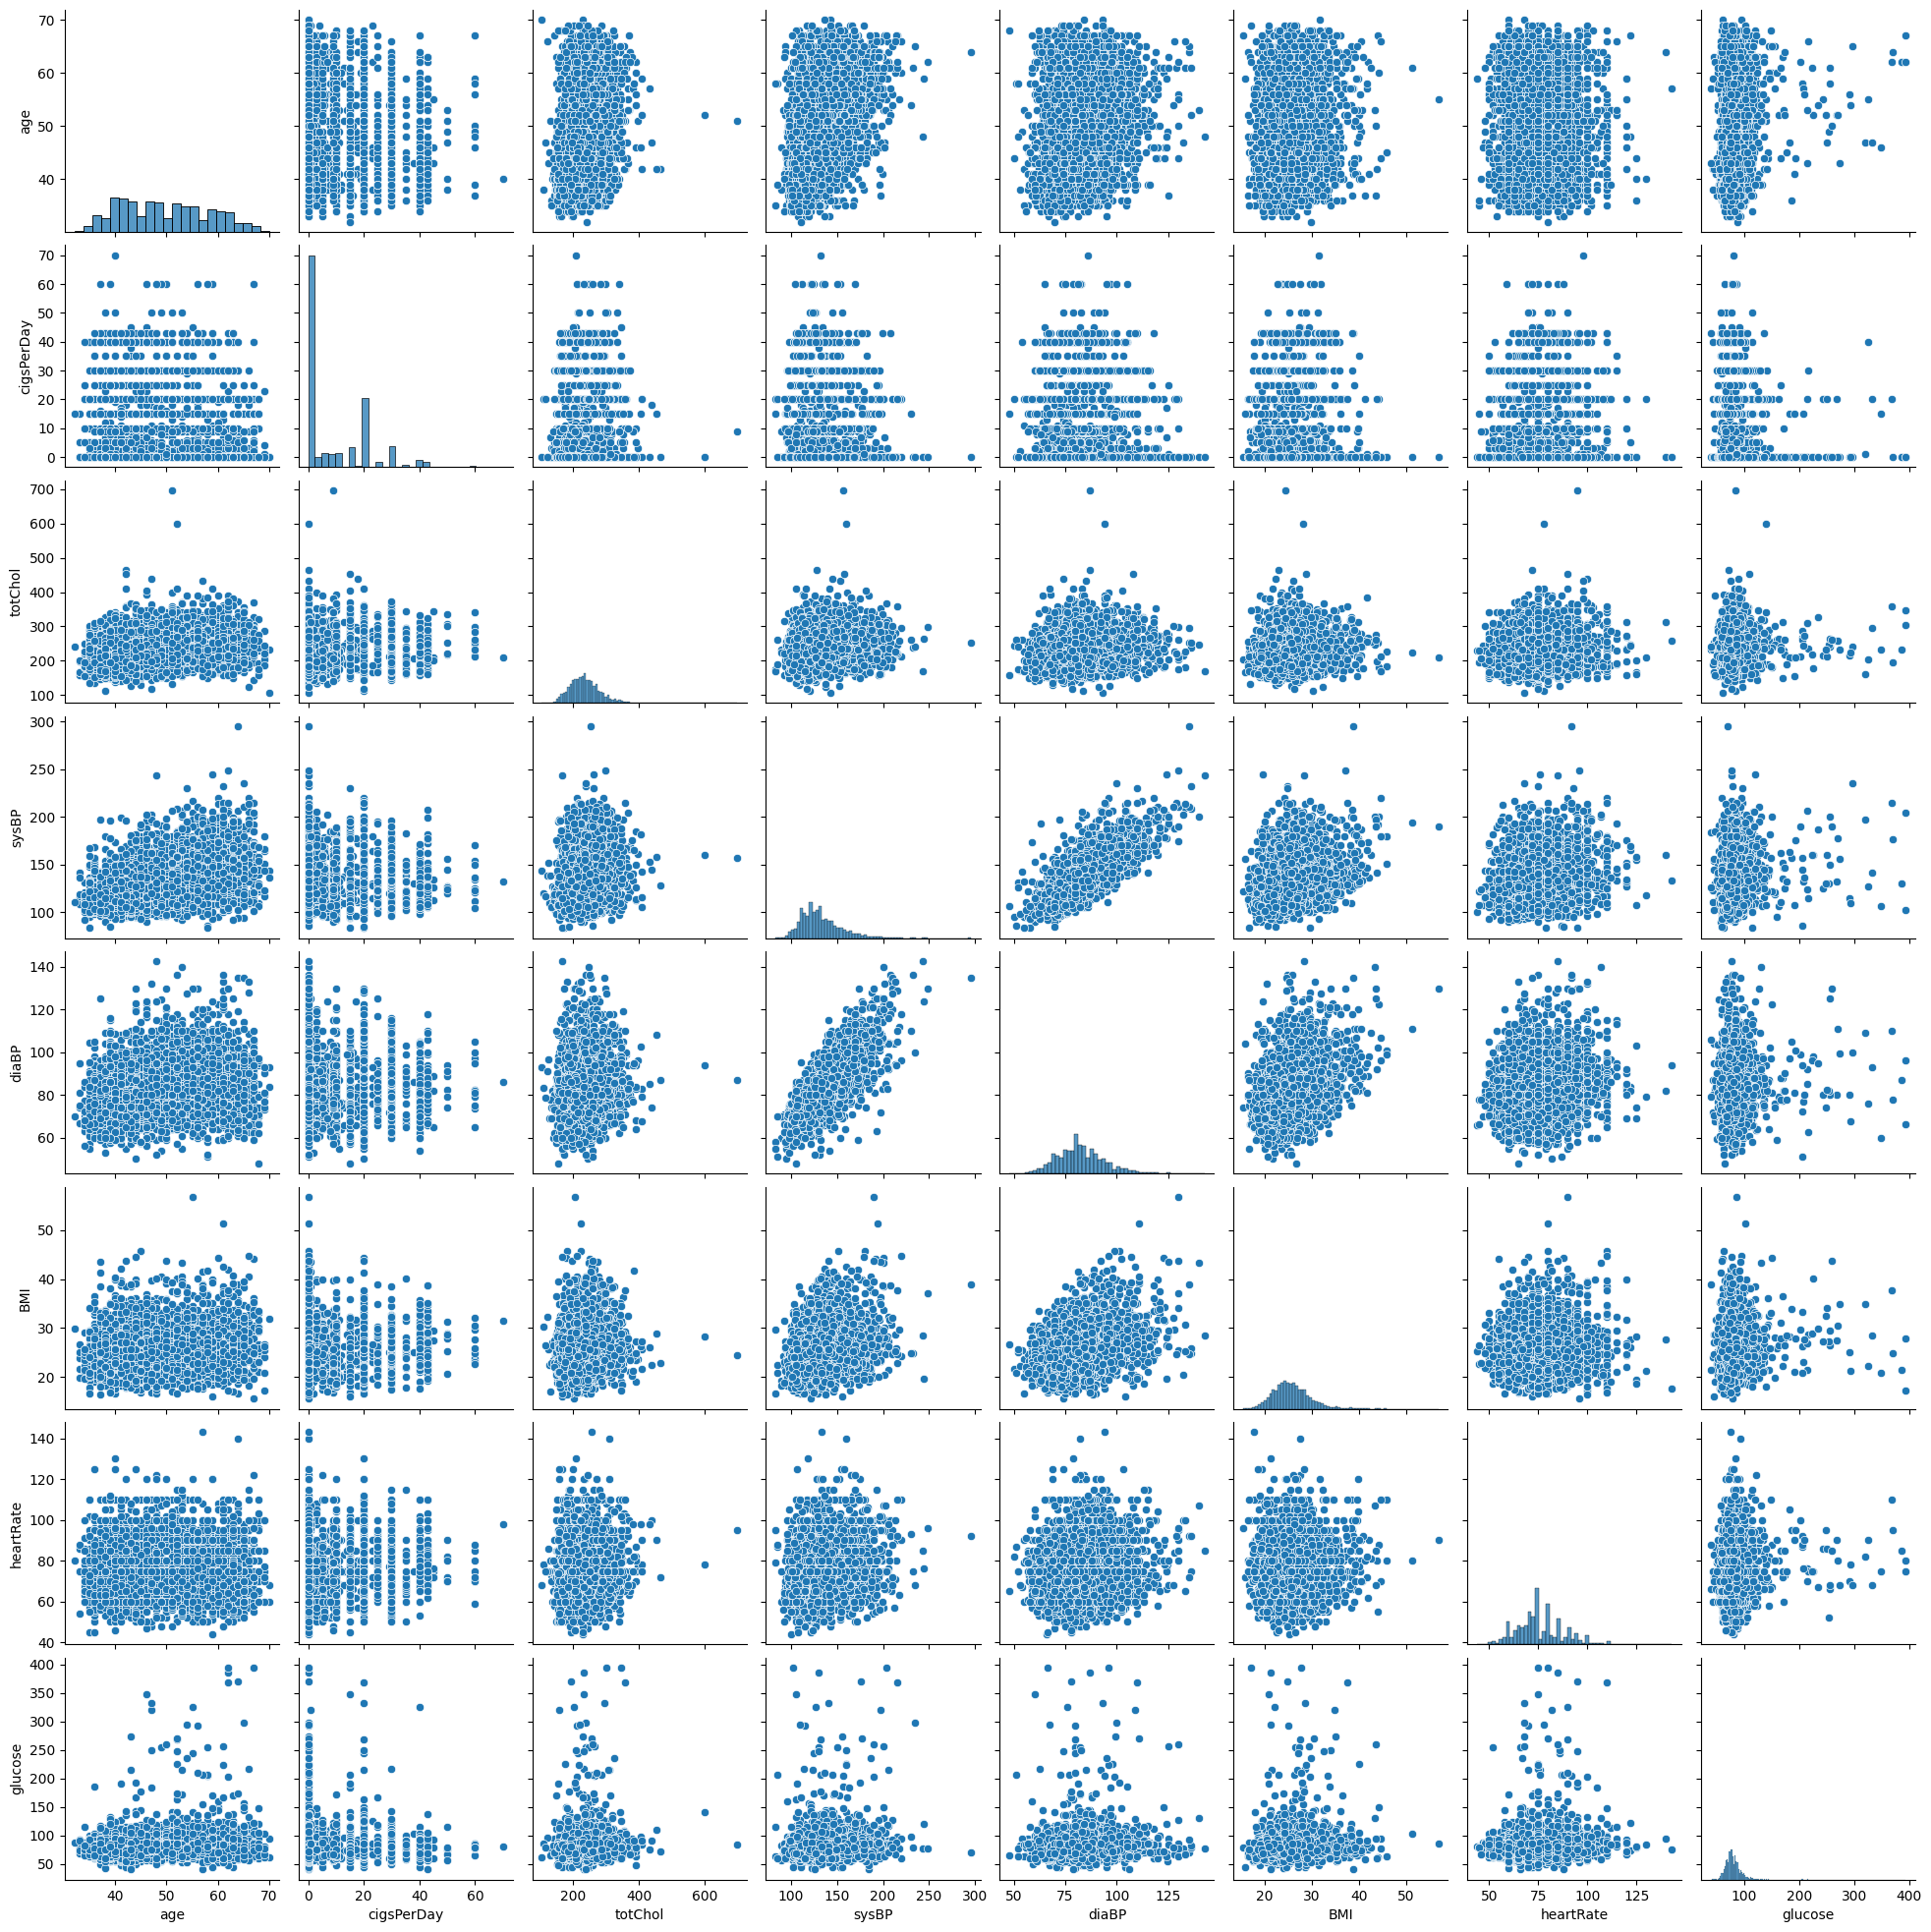

In [14]:
# Check  to see relationships between the numeric variables

sns.pairplot(df[num_cols]);

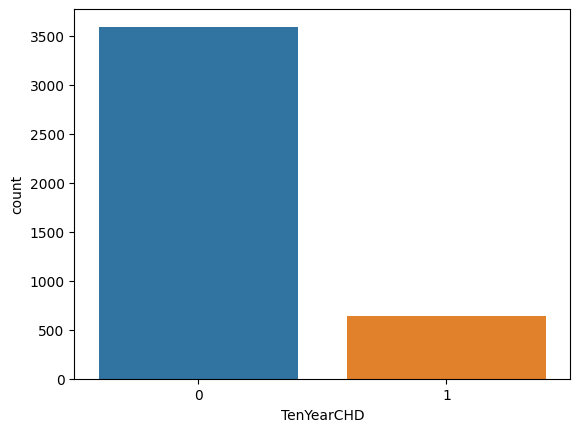

In [16]:
# Exploring the class distribution

sns.countplot(data=df, x="TenYearCHD");

In [17]:
# Define the X-features and y-label

X = df.drop(columns=['TenYearCHD'], axis=1)
y = df.TenYearCHD

In [22]:
# Defining the training and the testing set

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

## Pipeline for RandomForest

In [23]:
# Make a pipeline containing the  preprocessor and classifier

pipe = make_pipeline(KNNImputer(), StandardScaler(), RandomForestClassifier())

In [24]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('knnimputer', KNNImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [26]:
# Predict the X_test and store in y_pred to re-use

y_pred = pipe.predict(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8547169811320755

In [28]:
precission = precision_score(y_test, y_pred)
precission

0.5294117647058824

In [29]:
recall = recall_score(y_test, y_pred)
recall

0.05806451612903226

In [30]:
f1 = f1_score(y_test, y_pred)
f1

0.10465116279069768

## Pipeline for XGBOOST

In [33]:
# Make a pipeline containing the  preprocessor and classifier

pipexgb = make_pipeline(KNNImputer(), StandardScaler(), xgb.XGBClassifier())

# Fit the pipeline

pipexgb.fit(X_train, y_train)

# Predict the X_test and store in y_pred to re-use

y_predxgb = pipexgb.predict(X_test)

In [35]:
accuracyxgb = accuracy_score(y_test, y_predxgb)
precissionxgb = precision_score(y_test, y_predxgb)
recallxgb = recall_score(y_test, y_predxgb)
f1xgb = f1_score(y_test, y_predxgb)

In [39]:
print("XGB Accuracy: ", accuracyxgb)
print("XGB precission: ",precissionxgb)
print("XGB recall: ", recallxgb)
print("XGB f1: ", f1xgb)

XGB Accuracy:  0.8301886792452831
XGB precission:  0.2641509433962264
XGB recall:  0.09032258064516129
XGB f1:  0.1346153846153846


# SMOTE WITH XGB

In [44]:
pipesm = make_pipeline(KNNImputer(), 
                        StandardScaler(),
                       SMOTE(),
                        xgb.XGBClassifier())

# Fit the pipeline

pipesm.fit(X_train, y_train)

# Predict the X_test and store in y_pred to re-use

y_predsm = pipesm.predict(X_test)

In [45]:
accuracysm = accuracy_score(y_test, y_predsm)
precissionsm = precision_score(y_test, y_predsm)
recallsm = recall_score(y_test, y_predsm)
f1sm = f1_score(y_test, y_predsm)

In [46]:
print("XGB Accuracy: ", accuracysm)
print("XGB precission: ",precissionsm)
print("XGB recall: ", recallsm)
print("XGB f1: ", f1sm)

XGB Accuracy:  0.8207547169811321
XGB precission:  0.3118279569892473
XGB recall:  0.1870967741935484
XGB f1:  0.2338709677419355


# SMOTE WITH RANDOM FOREST

In [47]:
piperf = make_pipeline(KNNImputer(), 
                        StandardScaler(),
                       SMOTE(),
                        RandomForestClassifier())

# Fit the pipeline

piperf.fit(X_train, y_train)

# Predict the X_test and store in y_pred to re-use

y_predrf = piperf.predict(X_test)

In [48]:
accuracyrf = accuracy_score(y_test, y_predrf)
precissionrf = precision_score(y_test, y_predrf)
recallrf = recall_score(y_test, y_predrf)
f1rf = f1_score(y_test, y_predrf)


print("XGB Accuracy: ", accuracyrf)
print("XGB precission: ",precissionrf)
print("XGB recall: ", recallrf)
print("XGB f1: ", f1rf)

XGB Accuracy:  0.8245283018867925
XGB precission:  0.34951456310679613
XGB recall:  0.23225806451612904
XGB f1:  0.27906976744186046


In [49]:
pd.crosstab(y_test, y_predrf)

col_0,0,1
TenYearCHD,,
0,838,67
1,119,36


# GRIDSEARCH

In [51]:
params = {
    "randomforestclassifier__n_estimators":[100,300,500],
    "randomforestclassifier__max_depth":[5,7,9],
    "randomforestclassifier__min_samples_split":[2,5,8],
    "randomforestclassifier__min_samples_leaf":[2,4,6],
    "knnimputer__n_neighbors":[2,3,5]
}

In [53]:
rand = RandomizedSearchCV(piperf, params, n_iter=20, cv=5)

In [54]:
rand.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('knnimputer', KNNImputer()),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('smote', SMOTE()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=20,
                   param_distributions={'knnimputer__n_neighbors': [2, 3, 5],
                                        'randomforestclassifier__max_depth': [5,
                                                                              7,
                                                                              9],
                                        'randomforestclassifier__min_samples_leaf': [2,
                                                                                     4,
                                                                                     6],
                                        'randomforestclassifier__min_samples_split': [2,
                                                                                      5,
                                                                                      8],
                                        'randomforestclassifier__n_estimators': [100,
                                                                                 300,
                                                                                 500]})

In [56]:
rand.best_score_

0.7386792452830189

In [57]:
rand.best_params_

{'randomforestclassifier__n_estimators': 500,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_samples_leaf': 6,
 'randomforestclassifier__max_depth': 9,
 'knnimputer__n_neighbors': 3}

In [60]:
model = rand.estimator

In [61]:
model.fit(X_train, y_train)

Pipeline(steps=[('knnimputer', KNNImputer()),
                ('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('randomforestclassifier', RandomForestClassifier())])

In [62]:
y_pred_best = model.predict(X_test)

In [63]:
accuracy_best = accuracy_score(y_test, y_pred_best)
precission_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)


print("XGB Accuracy: ", accuracy_best)
print("XGB precission: ",precission_best)
print("XGB recall: ", recall_best)
print("XGB f1: ", f1_best)

XGB Accuracy:  0.8122641509433962
XGB precission:  0.319672131147541
XGB recall:  0.25161290322580643
XGB f1:  0.2815884476534296


In [64]:
pd.crosstab(y_test, y_pred_best)

col_0,0,1
TenYearCHD,,
0,822,83
1,116,39
